In [1]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

C:\Users\mivog\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = models.InceptionV1()
model.load_graphdef()

512 1099.1147


<img src="data:image/PNG;base64,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAACkCElEQVR4nAThZ7BliWEY6J2c87k533dfDv06d09PngEG4BBBBEWKChQlrcuS7JLsql2XteUftsu1taVa766rtKvyikuLMiWZIkFSIEACmIyJnft198v55njOPTkHfx/4e3/j2yMUWLxeGanm8dNxZXltgU9kInz6zclbv/PDMAQ/+Td/ufXWBiwCn/3pUy9J37izWS4IDx+9rL7dWKw2Lr85GHbp4uKVjSu5yemL5PzsoSf+8P/0Dz765P8nh13cJfuHXepKM18Ugw8e5lu0zCH2afKt/+od7cu/HB1gzd983z//ZSDLn/3+6ff/b7/1V19+efKRK99sLC8z9//jnslJf+PvvfXJ//gHRDMz8ZPlO9/PEKXT9tH5+Gg+T/7+tgSHya8wgBOwo5+cqw6x1QQuZ/PJ1LvKCldvVqUSeqlDj4/gtVxjMziSynXNhtElTqP8WjaVYJwg0FiBc5mFCNQCSAq7w/jzD/zj/rHncm9/r9thIVIZV2kl7d+jIe3RXn90EYtSffNvS3LqTHbQr3bwdtdFYKIgocWrQGthUtj2Tf34kx83GfXuDQpbly9QZv+yMz1UjXY4HZm2B8A4JzVL0lYGkha/s1YA1777ypuvXtv/pt0+PYcRUBDkxmo9NGMOYgrLS3uPH3j61HZ9RKIHAw+wzZsbizdfv3F5OcEJj13a6B3OuchYEaMjT57zHBL0UXM8HimJwOIUIVu6nDqVBpHLlmoYRTTYZHwhNpYJhtS7o0QqwdMX0ua3leOvNd0WmsvHXz/3KSYvE7Oz8bHiYQv5s89O5oQc2Ubt2naeK4WG/81e91Sbbt9bui1jl2FyNI3Ms+HwZICTPg4QMUrHlvnW3bVXtxZGprM3NrOpvSKsRjZExrMu4KLVousPhjChzQyZss8v569kajwC+zGTu3atRQL+z36yv7fPfe9HvbDcefw1XPQq6zViGk5efonWoLd+7Z+FRGEenxu+v0EO0d1j75PZPMaVXMkpLo8QPj57YfS//Hu/c4tmhZ5ufhkWdDdt8jJunxdwe24oZ3N793SgQ2Sl3NpCRkiGRvBEjOJeTuIaWQGEaTplpsZ0aJxpqdsddzHbpCgSAFOJZV1zPmwPTrJXM607j7/4OosIXIpR6HzvYK8H5JCl6+Nnjwg2RlKsLrM5pXt9IRtCVLEELmw2UsdMjIkJkzCIgQnMF0kg1JyIQmFbEG0kJQE72L67pR4/JcVFaZlses507sQ1MQM6YSCpPb0Dw2kaA4xfh1PENu+DXG8+jSJMG89ICmRIgYQYRpJtb9qdWF+/HGTowB30pz6gEkkpYczRiV9g7SQ8e3mfX7muQsD5+eTWsrS4vhajMgzjToADEMItLQDfvKQpsZARvvjL81utFc8HkvEz2JhdqX3XBthnw4Hr2lUoejFTM2laWa9aJ4ajW5bMsgzsB88ENqYQetSzx5GYW1rxn3aP9x6V2SSkIblQbNYMsNS8HFrjo8AiCOTX3/t277m7uLBoXwaL1dWODqoDf9hTgBQwzL1SRnRhLICgUPWFDJ3xJQlAoO6BBtIUsQ5PU5r1L09t17IcynD2z3Ov3m1FdmIOF4NxZVmotBpcsWKfP/E1g+BpKPGRyEcRHwSJxCIDx0EYKI0AhLmGWf0kCaHIkpsySPNItuaMXoplolIPlYQ86WmXUxAyQzsAAz8qlXg/8DXNpNmCsX8MJWlBYliphideGIwtSx/7umfPVb6gOZCLOjgeQd7ABUJQn7G8wqd4XeZtY64MR7V3f20GLLAigZltMQViS5dvXtV+usfDJEeEARyNj/otnvNGpmWB6OJrhMzWcByIGFztUnKLtmV2pZr4e9pxD82CZu/R8Pzs+9tVlqtM554Asoto9M3BI5wLt64u53g+DRHf8sPYGJtopdFw7UOkvWcdH02U8XkYxkeDUzpJOIqDIh8kCCThB+MIx0VazmCerc9MIrMyudhZg5NimxaofOowg3H/cvQSFZPCSmmxWXWONWq6Xy6T29drECWjOOzNzuajWaaYDWwscRwEAdM48cYdgM67Tp/KkIE2DCMqsB0A8BMUThOUjIDQ12EEhPEYhXF4Ok+mp5AazKbY8ZkZQtQpjWOUgHIUHRixNs3WFzicdzx40jtLkBgNQxSmQbKIwP6CRA0TbjQdd123gHjrS5WLsWaFsOXo2PQUcBLVBrcWGAKHcAdNjPOEz4AZEarnYA5hCRsC3SDAUmVgx6aFxGS+KNDk4dFRCMKFJNTsTuyT+QxLNZKnX47fEhnleMgGQG35lZDMGp3dpfeqR6Pzge9u0HJJWsBB254cpWl1vbBYSI3/+aeP73x3HTk8VvVIA2Pf9TwBYbhsFgpdAUH1lI0ojjX1vJzr9Z/QcqOQWzMCoJhdtiD3RD2nIW6kHEPeXoDFhVuvoSl/+sVZ0e/SJVrIMiBXtdzAVwcM5VVvbgdJiBFwkmQRSE1xGKZJSzPILAWiYOSHEArCNDUanueJEiyu2aYROzPPdCPCSFIQirhyo9psxcsOOr6Lvzycd+fJxEgDC0ARgMnyoBe4qW20ByIOxriA5LOh4/GkB1NEEmivL1V3jhF6Cer2tGFEBYa2VK8mqO/3p6XWIk0JOEckRve4PVigCYZmAyBZe3NZtwKVTjAcxYKAMgLViQJGFsjUClwEB8s0r11cUDFQrtcFOZOmoYtyGcx4fNpepQWmdsV1IFTk+Bzx9UfPNMW48uYdgWfCMCWbt5OLKRFGZMa8VQ/++ueXyMrC1suDA4LRWJTMiHkPiqwAyjAiEuOwtNCe3B9PLkoi6cXxtHfEEzmIqJqRQQh5J9VRNpmFYGWjBuretNfO48RGld96dZXP1GajmUgqwkKdprO+pUYhlkY6BPVDP+Yz16zuMSop3tjDS00QRcPR2EeNfFmOgjiYaXxG1qZtgHJTC2Cr14IA5mQh9ftSAPGqU6lkjvvGLCwcHOoRicVuxprNQaWHMmQQY5JQ8CILp0Hd9D3f98zgcHACxnbFwRaLle7FJAkQ31Ijkxh7xGJuOyT4PBL0tSkduAAjeASD+IDQzCMWpMwGEeDNIORyMKBz+Vy9BaFgHDuwAwOgOhu0c5yE5OQYhOYGzQj+YfcZEoP1jWYoC/7MF/K+pU/bU7jI5hqFAkTB4YjwNCVOvdBLMAzcWl756fMdpFoSTo8SBydAKCGzJBxFLIpFUB40NcK4LDOkz65faDsUqFZoOgzGpmbl+GUXjmfOEx8OUYHFEsrumziQq3F+o5aHIXJ+esLyFIIUwFh2RmeB76AYEQIOCfig8J493HPi0+hSJ8pv4AgHoWiEHqqKzbAEDnNSWTDOPglABfYYTqiAGIYQqNl9Np9N5wgxGISnA6s9igVuyPHCRGMAkhTyog2CEIZBcRoGLhCjU3UaJH6jLtP0guUc+RFyMIdKw+PVTInNAkPUM22XwMQoRFkmcTzPDCmIspIAJyDHM4OizBosbs6VQkE0TJuSsEkQF1bqEI7ZXTMPWjBE6qPZenOVpUDQmXbmfakmOydjrLHMvbruJPEsGMol+dHRharC1woSyCee5rFkZE/mFETT5ZI66CCAvby+hARZlJKo3mHIprE/VWkAGOu65oQhBAIgwZOrEE6US8v6bGKAWhzGGZzrmzOGt10UBYPR9frK0cU0QYQGN99c4JpXRbc3lkUEIuEYF5TBS5z0IRDBMQYhyyQnGP1fWM4ckWsEv6rMDumkFZImVmgU4osQW2S4HAwAESFQiOQHHCiygJ+q7S+VwHF8xErgpUaVzxhyxv7Voy48N0BZjAwKhTJCrqxZBmCcGz6SuqDEAj4jgRFKUtO5Y79akqXra3/5Vw+eTdAwDiprZcvVaC6t8nGVhjuTWeAqlWozVrS50hHEkh3ICBLX6k22VJ+dXZ6nYOXO6ivXv5MGAD43MBIY
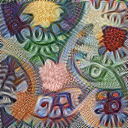

In [4]:
_ = render.render_vis(model, "mixed4a_pre_relu:476")